## 1. p-value
1. 용어
 - 유의 확률
 - significance probability, asymptotic(점근선의) significance
 - p-값
 - p-value, probability value
2. 뜻
 - 귀무가설이 맞을 때, 극단적인 결과가 관측될 확률
 - 0~1 사이의 값

## 2. 유의수준
1. 용어
 - significant level
 - α
 - 1종 오류를 범할 최대의 값
2. 1종 오류
 - 진실이 귀무가설임에도 불구하고, 귀무가설을 기각하는 경우

이 그래프에서 평균은 3.0이고 표준편차는 0.8이다.
만약 x 가 5.4보다 클 확률을 구하려면
점선의 우측 넓이를 구하면 된다.
이 값은 적분으로 구하면 되며, 이 부분이 기각역 안에 들어오면, 귀무가설을 기각하게 되고
기각역에 들어오지 않게 되면 귀무가설을 채택하게 된다.
즉, p-value 는 적분값이다.


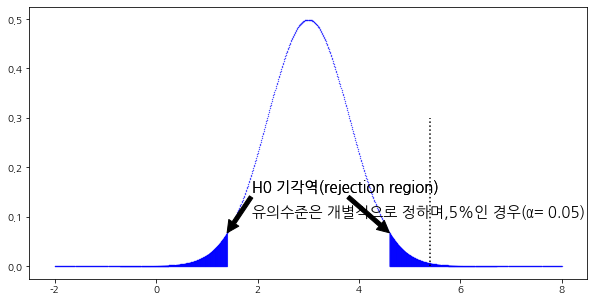

In [101]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
# 그래프에서 마이너스 폰트 깨지는 것 방지
mpl.rcParams['axes.unicode_minus'] = False
start = -2
end = 8
x = np.linspace(start, end, 1000)
mean = (start+end)/2
standard_deviation = 0.8
std = standard_deviation

def gausian_graph(x,mean,std):
    y1 = 1/np.sqrt(2*np.pi)/std
    first = mean + 2*std
    y2_first = np.exp(-(first-mean)**2/2/std**2)
    y_first = y1*y2_first
    rejection_region_array1= np.linspace(first, end, 1001)
    
    second = mean - 2*std
    y2_second = np.exp(-(second-mean)**2/2/std**2)
    y_second = y1*y2_second
    rejection_region_array2= np.linspace(second, start, 1001)
    plt.figure(figsize = (10,5))
    for i in range(len(x)):
        xspot = x[i]              
        y2 = np.exp(-(xspot-mean)**2/2/std**2)
        yspot = y1*y2
        plt.scatter(xspot,yspot,s=0.1,c='b')
        
        y2_left_reg = np.exp(-(rejection_region_array1[i]-mean)**2/2/std**2)
        yspot_left_reg = y1*y2_left_reg
        y2_right_reg = np.exp(-(rejection_region_array1[i+1]-mean)**2/2/std**2)
        yspot_right_reg = y1*y2_right_reg
        plt.fill_between((rejection_region_array1[i],rejection_region_array1[i+1]),(yspot_left_reg,yspot_right_reg)
                         ,color='b',alpha=0.3)
        
        yy2_left_reg = np.exp(-(rejection_region_array2[i]-mean)**2/2/std**2)
        yyspot_left_reg = y1*yy2_left_reg
        yy2_right_reg = np.exp(-(rejection_region_array2[i+1]-mean)**2/2/std**2)
        yyspot_right_reg = y1*yy2_right_reg
        plt.fill_between((rejection_region_array2[i],rejection_region_array2[i+1]),(yyspot_left_reg,yyspot_right_reg)
                         ,color='b',alpha=0.3)
        
    text1 = 'H0 기각역(rejection region)'
    text2 = '유의수준은 개별적으로 정하며,5%인 경우(α= 0.05)'
    plt.annotate(text1,(second,y_second),xytext=(second+0.5,0.15),fontsize=15,arrowprops=dict(facecolor='black'))
    plt.annotate(text1,(first,y_first),xytext=(second+0.5,0.15),fontsize=15,arrowprops=dict(facecolor='black'))
    plt.text(second+0.5,0.1,text2,fontsize=15)
    plt.vlines(mean+3*std,0,0.3,linestyles='dotted')
    print('이 그래프에서 평균은 {}이고 표준편차는 {}이다.'.format(mean,std))
    print('만약 x 가 {}보다 클 확률을 구하려면'.format(mean+3*std))
    print('점선의 우측 넓이를 구하면 된다.')
    print('이 값은 적분으로 구하면 되며, 이 부분이 기각역 안에 들어오면, 귀무가설을 기각하게 되고')
    print('기각역에 들어오지 않게 되면 귀무가설을 채택하게 된다.')
    print('즉, p-value 는 적분값이다.')
        
gausian_graph(x,mean,std)